# CUSTOMER CHURN PREDICTION

#### IMPORT NECESSARY LIBRARIES

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as snsr
from math import sqrt
import tensorflow as tf
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
df=pd.read_clipboard()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### GETTING INFO 

In [26]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [28]:
df.isnull().sum()         # No missing values are present

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [30]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [31]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

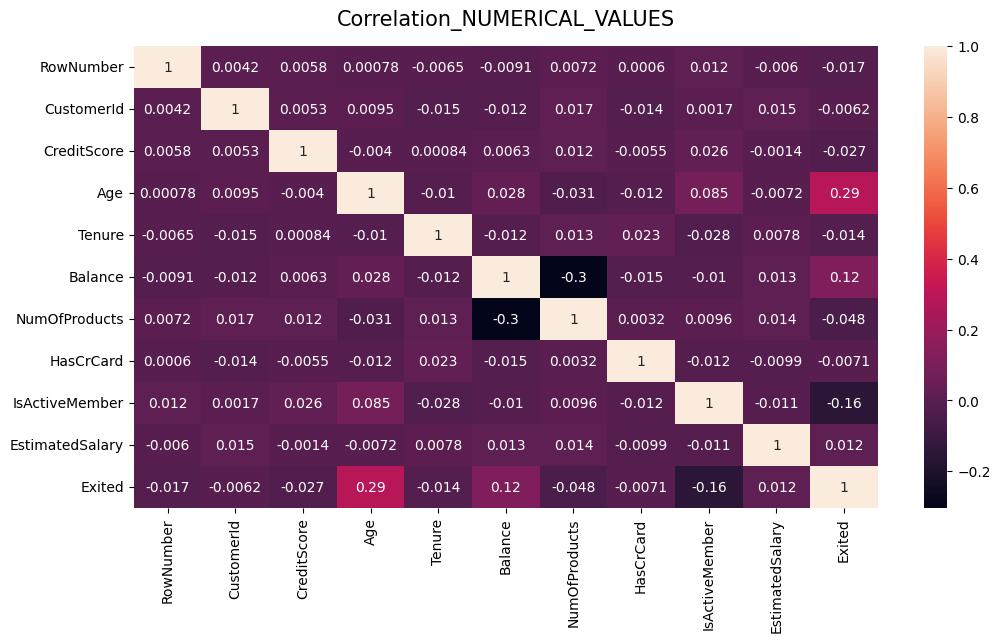

In [32]:
# CORRELATION

numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr()
plt.figure(figsize = [12,6])
plt.title("Correlation_NUMERICAL_VALUES", size = 15, pad = 15)
sns.heatmap(corr, annot = True)
plt.show()



# Age and Balance are positively correlated with Exited feature.
# IsActiveMember is negatively correlated with Exited.

Text(0.5, 1.0, 'Genders Vs Customers')

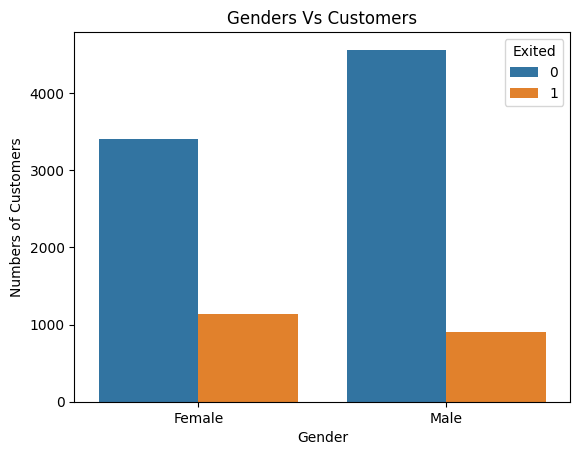

In [33]:
# USing Seaborn for visualization

sns.countplot(x='Gender',hue='Exited',data=df)
plt.xlabel('Gender')
plt.ylabel('Numbers of Customers')
plt.title("Genders Vs Customers")


#  The majority of customers are male.

Text(0.5, 1.0, 'Geography Vs Customers')

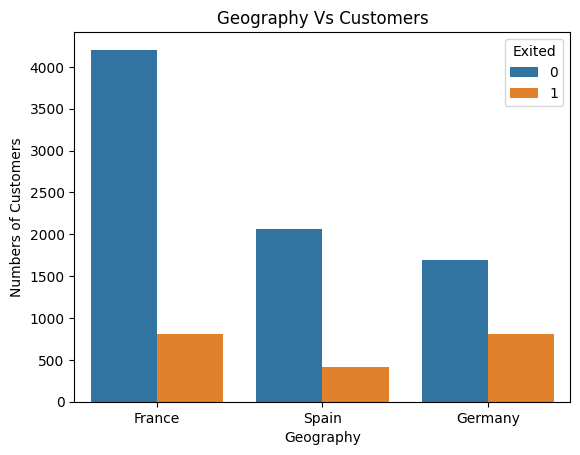

In [34]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.xlabel('Geography')
plt.ylabel('Numbers of Customers')
plt.title("Geography Vs Customers")

# Most of the customers are from France

In [35]:
df.drop(columns=['Surname', 'CustomerId', 'RowNumber'], inplace=True)
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

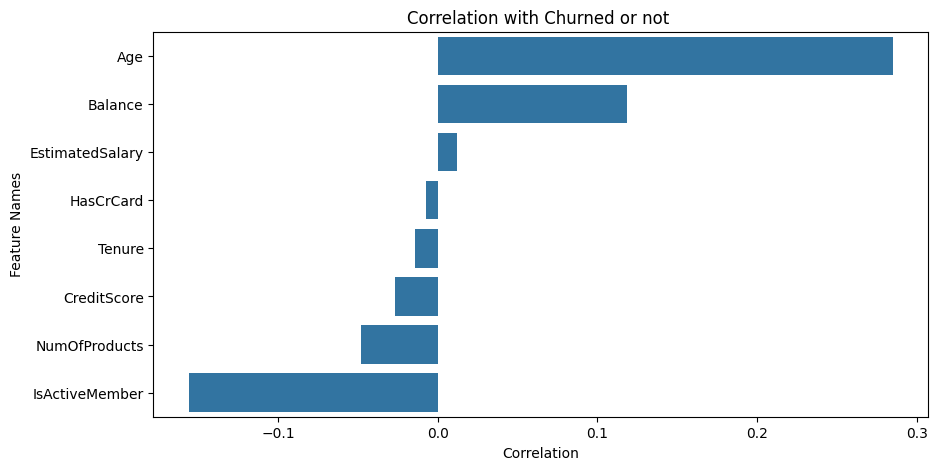

In [36]:
# BAR CHART FOR CORRELATION

feature_corr = df.drop(columns='Exited').select_dtypes('number').apply(lambda x: x.corr(df['Exited']))
feature_corr = pd.DataFrame(feature_corr,columns = ['Correlation']).sort_values(['Correlation'],ascending = False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_corr['Correlation'], y=feature_corr.index).set(
title="Correlation with Churned or not ", xlabel="Correlation",
ylabel="Feature Names")
plt.show()

In [37]:
# DATA CONVERTING THE COLUMN TENURE

df.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [38]:
labels = ["{0} - {1}".format(i,i+2) for i in range(0,11,2) ]
labels

['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10', '10 - 12']

Text(0.5, 1.0, 'Tenure Vs Churning')

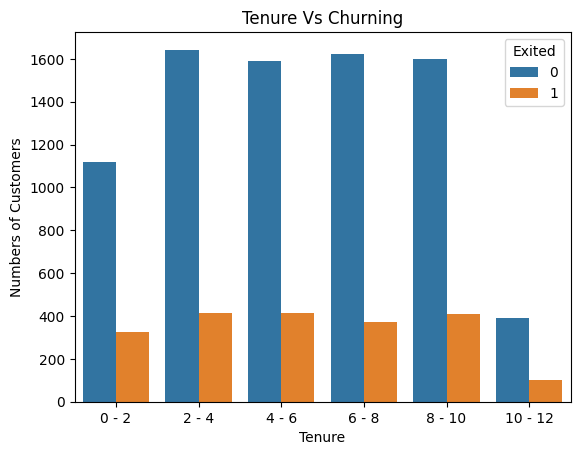

In [39]:
df["TenureGroup"] = pd.cut(df['Tenure'],range(0,13,2),labels =labels,right=False)
sns.countplot(x='TenureGroup',hue='Exited',data=df)
plt.xlabel('Tenure')
plt.ylabel('Numbers of Customers')
plt.title("Tenure Vs Churning")

Text(0.5, 1.0, 'Age Vs Churning')

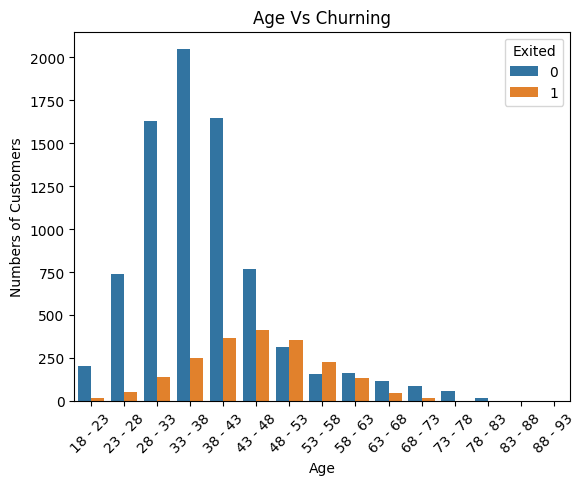

In [40]:
# FOR AGE COLUMN

label = ["{0} - {1}".format(i,i+5) for i in range(18,93,5)]
df["AgeGroup"]=pd.cut(df['Age'],range(18,94,5),labels=label,right=False)
sns.countplot(x='AgeGroup',hue='Exited',data=df)
plt.xlabel('Age')
plt.xticks(rotation = 45)
plt.ylabel('Numbers of Customers')
plt.title("Age Vs Churning")

In [41]:
# USE ONEHOT ENCODING 
df = pd.get_dummies(df, columns=['Geography', 'Gender','TenureGroup','AgeGroup'], drop_first=True)


In [42]:
# FEATURE SCALING

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numeric_columns = ['CreditScore','Balance','EstimatedSalary']
df[numeric_columns] = ss.fit_transform(df[numeric_columns])
X=df.drop(columns = ['Exited'])
y=df['Exited']

### DATA MODELLING

In [43]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=420)
print(X_train.shape)
print(X_test.shape)

(7000, 30)
(3000, 30)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,accuracy_score,classification_report

rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8533333333333334

Confusion Matrix:
 [[2290  108]
 [ 332  270]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2398
           1       0.71      0.45      0.55       602

    accuracy                           0.85      3000
   macro avg       0.79      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



In [45]:
import xgboost as xgb
from xgboost import XGBClassifier


xgb_c = xgb.XGBClassifier()
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_x)
conf_matrix = confusion_matrix(y_test, y_pred_x)
classification_rep = classification_report(y_test, y_pred_x)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8433333333333334

Confusion Matrix:
 [[2238  160]
 [ 310  292]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      2398
           1       0.65      0.49      0.55       602

    accuracy                           0.84      3000
   macro avg       0.76      0.71      0.73      3000
weighted avg       0.83      0.84      0.83      3000



##### Accuracy: The Random Forest model has slightly higher accuracy than the Xgboost model.
##### Confusion Matrix: Both models have a higher number of correct predictions for Class 0 (non-spam),
##### while the ability to predict Class 1 (spam) is comparatively lower in both cases.

##### In summary, both models perform relatively well in predicting Class 0 but struggle more with Class 1 predictions.

In [46]:
X_train.dtypes

CreditScore            float64
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Geography_Germany         bool
Geography_Spain           bool
Gender_Male               bool
TenureGroup_2 - 4         bool
TenureGroup_4 - 6         bool
TenureGroup_6 - 8         bool
TenureGroup_8 - 10        bool
TenureGroup_10 - 12       bool
AgeGroup_23 - 28          bool
AgeGroup_28 - 33          bool
AgeGroup_33 - 38          bool
AgeGroup_38 - 43          bool
AgeGroup_43 - 48          bool
AgeGroup_48 - 53          bool
AgeGroup_53 - 58          bool
AgeGroup_58 - 63          bool
AgeGroup_63 - 68          bool
AgeGroup_68 - 73          bool
AgeGroup_73 - 78          bool
AgeGroup_78 - 83          bool
AgeGroup_83 - 88          bool
AgeGroup_88 - 93          bool
dtype: object

In [47]:
y_train.dtypes

dtype('int64')

In [53]:
import tensorflow as tf
from tensorflow.keras import utils, Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.activations import relu, sigmoid

X_train = X_train.astype(int)  
X_test = X_test.astype(int)  

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=0)

y_pred_prob = model.predict(X_test)
y_pred_nn = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_nn)
conf_matrix = confusion_matrix(y_test, y_pred_nn)
classification_rep = classification_report(y_test, y_pred_nn)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)




94/94 [==============================] - 25s 11ms/step
Accuracy: 0.858

Confusion Matrix:
 [[2315   83]
 [ 343  259]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2398
           1       0.76      0.43      0.55       602

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



### RANDOM FOREST CLASIFIER

In [55]:
# HYPERPARAMETER

param_grid_rf = {
    "n_estimators":range(10,150,10) , #number of trees in forest randint(low=10, high=100)
    "max_depth":range(2,20,2)       #depth of each tree   randint(low=2, high=20)
} 

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=50,                            
    verbose=1,                  
    scoring='accuracy',
    random_state=123,
    return_train_score=True,
)
X=df.drop(columns = ['Exited'])
y=df['Exited']
random_search_rf.fit(X_train, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': range(2, 20, 2),
                                        'n_estimators': range(10, 150, 10)},
                   random_state=123, return_train_score=True,
                   scoring='accuracy', verbose=1)

In [56]:
# tO GET THE BEST hyperparameter

print("Best hyperparameter values: ", random_search_rf.best_params_)
print("Best score: %0.3f" % (random_search_rf.best_score_))

Best hyperparameter values:  {'n_estimators': 130, 'max_depth': 12}
Best score: 0.862


#### The model performance, given the selected hyperparameters, achieved a score of 0.862, which might be an indication of good performance
#### on the validation or test set.

#### Deeper trees (max_depth = 12) and a significant number of estimators (n_estimators = 130) seem to contribute to better model performance,
#### capturing more complex patterns and ensembling a sufficient number of trees.